In [11]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import user, password, host

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import explore as e
import os
directory = os.getcwd()

## Exercises

### Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

### 1. Load your zillow dataset.

In [16]:
df = w.prep_zillow(w.get_zillow_data())
df.head()

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,taxvalue,yearbuilt,taxamount,county
0,20,4,2.0,3633,222321.0,74104.0,296425,2005,6941.39,LA
1,31,3,4.0,1620,339532.0,508238.0,847770,2011,10244.94,LA
2,33,3,2.0,2077,210192.0,436568.0,646760,1926,7924.68,LA
3,62,0,0.0,1200,595.0,4733.0,5328,1972,91.60,LA
5,99,0,0.0,203,7083.0,7083.0,14166,1960,163.79,LA


In [14]:
# split the data

train, validate_and_test = train_test_split(df, train_size=.60, random_state=123)
validate, test = train_test_split(validate_and_test, test_size=.50, random_state=123)

train.shape, validate.shape, test.shape

((1283062, 10), (427687, 10), (427688, 10))

In [23]:
Xtrain = train.drop(columns=['taxvalue','county'])
Xvalidate = train.drop(columns=['taxvalue','county'])
Xtest = test.drop(columns=['taxvalue','county'])
ytrain = train.taxvalue
yvalidate = validate.taxvalue
ytest = test.taxvalue

Xtrain

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,yearbuilt,taxamount
926160,1289383,4,3.0,2010,97093.0,22343.0,1947,1958.36
1083249,1508166,3,2.0,1315,101222.0,404892.0,1940,6192.70
613062,853501,3,3.0,2130,238800.0,38200.0,1988,4074.81
320744,446343,3,2.5,1893,193557.0,187240.0,2000,4466.86
632541,880703,4,2.0,2133,370672.0,370672.0,1964,7822.74
...,...,...,...,...,...,...,...,...
1958034,2725440,3,2.0,1973,112543.0,559457.0,1974,7857.04
1242967,1730916,4,2.0,1650,139714.0,12640.0,1976,1765.26
28082,39008,4,3.0,2340,79094.0,24621.0,1969,1560.96
278295,387115,4,2.0,1407,203964.0,203964.0,1973,5013.10


In [24]:
ytrain

926160     119436
1083249    506114
613062     277000
320744     380797
632541     741344
            ...  
1958034    672000
1242967    152354
28082      103715
278295     407928
774830     305061
Name: taxvalue, Length: 1283062, dtype: int64

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.
Here is some sample code to get you started:

In [35]:
baseline_mean = ytrain.mean()
baseline_mean

459847.1029007172

In [28]:
baseline_med = ytrain.median()
ba

328215.5

In [31]:
# make an object
lm = LinearRegression()
# fit an object
lm.fit(Xtrain[['sqft']], ytrain)
# use an object
yhat = lm.predict(Xtrain[['sqft']])

#### Variables

#### x: sqft
#### y: actual taxvalue
#### baselinemean: sqft baseline prediction
#### yhat: taxvalue OLS prediction

In [54]:
predictions_df = pd.DataFrame(
    {'sqft':Xtrain.sqft.values,
    'y_act': ytrain,
    'yhat' : yhat,
    'baseline_med': baseline_med,
    'baseline_mean': baseline_mean},
index=Xtrain.index)

In [55]:
predictions_df.head()

,sqft,y_act,yhat,baseline_med,baseline_mean
926160,2010,119436,510680.897024,328215.5,459847.102901
1083249,1315,506114,271389.314603,328215.5,459847.102901
613062,2130,277000,551997.429241,328215.5,459847.102901
320744,1893,380797,470397.278113,328215.5,459847.102901
632541,2133,741344,553030.342546,328215.5,459847.102901


In [56]:
# compute residuals
predictions_df['residual'] = predictions_df['yhat'] - predictions_df['y_act']
predictions_df['residual_baseline_med'] = predictions_df['baseline_med'] - predictions_df['y_act']
predictions_df['residual_baseline_mean'] = predictions_df['baseline_mean'] - predictions_df['y_act']

In [57]:
predictions_df.head()

,sqft,y_act,yhat,baseline_med,baseline_mean,residual,residual_baseline_med,residual_baseline_mean
926160,2010,119436,510680.897024,328215.5,459847.102901,391244.897024,208779.5,340411.102901
1083249,1315,506114,271389.314603,328215.5,459847.102901,-234724.685397,-177898.5,-46266.897099
613062,2130,277000,551997.429241,328215.5,459847.102901,274997.429241,51215.5,182847.102901
320744,1893,380797,470397.278113,328215.5,459847.102901,89600.278113,-52581.5,79050.102901
632541,2133,741344,553030.342546,328215.5,459847.102901,-188313.657454,-413128.5,-281496.897099


### 3. Plot the residuals for the linear regression model that you made.

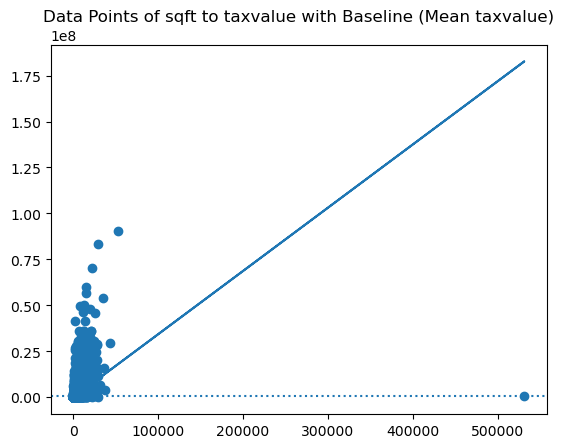

In [59]:
plt.scatter(Xtrain.sqft, ytrain)
plt.axhline(ytrain.mean(), ls=':')
plt.plot(Xtrain.sqft, predictions_df['yhat'])
plt.title('Data Points of sqft to taxvalue with Baseline (Mean taxvalue)')
plt.show()

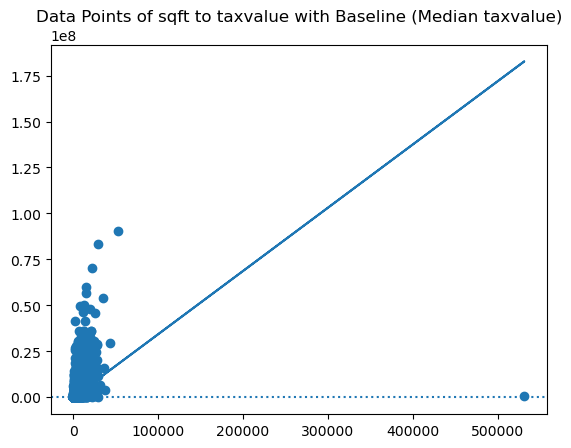

In [61]:
plt.scatter(Xtrain.sqft, ytrain)
plt.axhline(ytrain.median(), ls=':')
plt.plot(Xtrain.sqft, predictions_df['yhat'])
plt.title('Data Points of sqft to taxvalue with Baseline (Median taxvalue)')
plt.show()

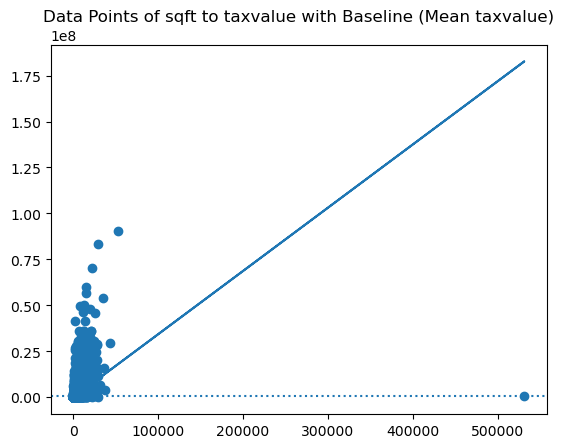

In [63]:
plt.scatter(Xtrain.sqft, ytrain)
plt.axhline(baseline_mean, ls=':')
plt.plot(Xtrain.sqft, predictions_df['yhat'])
plt.title('Data Points of sqft to taxvalue with Baseline (Mean taxvalue)')
plt.show()

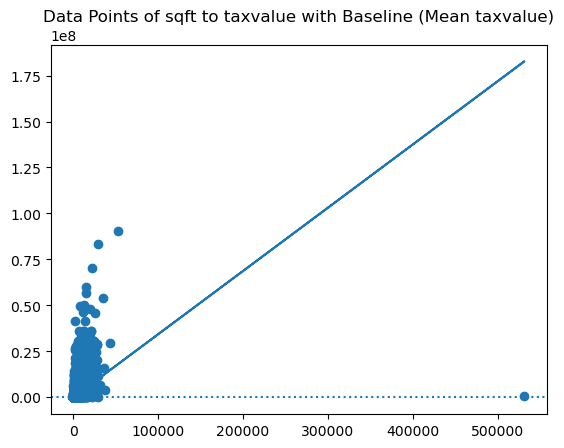

In [64]:
plt.scatter(Xtrain.sqft, ytrain)
plt.axhline(baseline_med, ls=':')
plt.plot(Xtrain.sqft, predictions_df['yhat'])
plt.title('Data Points of sqft to taxvalue with Baseline (Mean taxvalue)')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [37]:
predictions_df.columns

Index(['y_act', 'lm', 'baseline_med', 'baseline_mean'], dtype='object')

In [38]:
(predictions_df['lm'] - predictions_df['y_act']).sum()

587622822756.9996

In [40]:
# Calculate the square of the residuals
baseline_resid_squared = (predictions_df['baseline_mean'] - predictions_df['y_act']) ** 2
baseline_resid_squared[:10]

926160     2.096148e+11
1083249    2.102517e+11
613062     2.095049e+11
320744     2.097220e+11
632541     2.095022e+11
8808       2.102875e+11
1680099    2.100051e+11
556380     2.108611e+11
666067     2.097577e+11
1675388    2.105994e+11
dtype: float64

In [42]:
# Sum up the residual squares
sum_baseline_resid = baseline_resid_squared.sum()
sum_baseline_resid

2.6912376241930173e+17

In [43]:
# MSE (Mean Squared Error)

# the average of your errors that have each been squared
# MSE = SSE/(no. of data points)
# his will be used to calculate RMSE in the next step
sum_baseline_resid / train.shape[0]

209751175250.53485

In [44]:
# RMSE (Root Mean Squared Error)

# Square root of MSE
# Same units as the output (y) variable
(sum_baseline_resid / train.shape[0]) ** (1/2)

457985.9989678013

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(predictions_df['y_act'], 
                   predictions_df['baseline_mean'],
                  squared=False)

457985.9989678013

In [47]:
mean_squared_error(predictions_df['y_act'], 
                   predictions_df['baseline_med'],
                  squared=False)

326354.9018829312

In [49]:
# median has a lower error metric by rmse, so lets save that metric
best_baseline_rmse = mean_squared_error(predictions_df['y_act'], 
                   predictions_df['baseline_med'],
                  squared=False)
best_baseline_rmse

326354.9018829312

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

### 7. What is the amount of variance explained in your model?

### 8. Is your model better than the baseline model?

### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false